# **Drivers Crash Analysis in Maryland(USA)**

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries and Notebook Setup
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
3. [**Data Proprocessing**](#3)
4. [**Data Analysis**](#4)
5. [**Conclusion**](#5)
    - Insights
    - Suggestions
    - Possible Next Steps
6. [**Epilogue**](#6) 
    - References
    - Versioning

---

# 1

## Introduction

**Traffic accidents** are one of the most significant public safety concerns in modern urban life. With thousands of crashes occurring annually, understanding when, where, and why these incidents happen is crucial for building safer roads, informing public policy, and enhancing driver awareness.

**This project aims to uncover patterns and insights in traffic crash data collected in the state of Maryland**, with a special focus on injury severity, driver fault, and the impact of environmental conditions such as weather, surface, and lighting.

### Project Description

**Goal/Purpose:** 

This project aims to perform **Exploratory Data Analysis (EDA)** on **Traffic crash and drivers data** to uncover patterns and insights that can help improve road safety. The key focus is to analyze how weather conditions, surface conditions, and time factors (such as hour and weekday) impact the severity of crashes and driver fault.
Understanding these patterns is crucial for traffic authorities, urban planners, and policymakers to design preventive measures, enforce traffic laws effectively, and enhance public awareness around risky driving conditions

<p>&nbsp;</p>

**Questions to be Answered:**

- Question 1: **How do weather and surface conditions affect the severity of traffic crashes and driver responsibility?**
- Question 2: **When are crashes most likely to occur and how serious are they?**

<p>&nbsp;</p>

**Assumptions/Methodology/Scope:** 

**Data Cleaning:** 
- Removed irrelevant or inconsistent columns. Filled missing values in string-based columns with "NA". Parsed and standardized the datetime fields into separate Crash Date, Crash Time, and Hour columns.

**Scope:** 
- Focused on crash-level variables such as weather, lighting, road surface, and driver condition.

**Methodology:** 
- Visualized relationships using bar charts, pie charts and heatmaps using Plotly, Matplotlib, and Seaborn.

**Limitations:** 
- Does not include individual driver profiles or real-time traffic volume data. Causality is not inferred, only patterns.

<p>&nbsp;</p>

### Data Description

**Content:** 

This dataset is a CSV file containing thousands of traffic crash records in the state of Maryland. Each row represents a unique reported crash, with details about time, location, vehicle involved, environmental conditions, and injury severity.

<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by _(. The original dataset was scraped by _) and the original source can be found on [website](https:catalog.data.gov/dataset/crash-reporting-drivers-data).

---

# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [1]:
#Installing the Libraries 
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dateutil import parser
from datetime import datetime

# Loading the data

In [3]:
# Loading the file into the notebook
file_name = "C:/Users/ASUS/OneDrive/Desktop/EDA_Project/Crash_Reporting_-_Drivers_Data.csv"
df = pd.read_csv(file_name, low_memory= False)
# Display the number rows and columns in the data sets
print("Counting the shapes of the data sets (rows, columns):", df.shape)

Counting the shapes of the data sets (rows, columns): (196043, 39)


### Basic Data Exploration

In [4]:
# Display the Column Names in a List
print("Column Names:")
print(df.columns.tolist())

Column Names:
['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location']


In [5]:
# Display the first 5 rows of the column in the data set
print(df.head())
#Display the last rows in the column in the data set
print(df.tail())

  Report Number Local Case Number                Agency Name  \
0    DM8479000T         210020119  Takoma Park Police Depart   
1   MCP2970000R          15045937                 MONTGOMERY   
2   MCP20160036         180040948   Montgomery County Police   
3    EJ7879003C         230048975  Gaithersburg Police Depar   
4   MCP2967004Y         230070277   Montgomery County Police   

        ACRS Report Type         Crash Date/Time        Route Type  \
0  Property Damage Crash  05/27/2021 07:40:00 PM               NaN   
1  Property Damage Crash        09-11-2015 13:29               NaN   
2  Property Damage Crash  08/17/2018 02:25:00 PM               NaN   
3           Injury Crash        08-11-2023 18:00               NaN   
4  Property Damage Crash        12-06-2023 18:42  Maryland (State)   

         Road Name Cross-Street Name               Off-Road Description  \
0              NaN               NaN                     IN PARKING LOT   
1              NaN               NaN    Park

---

# 3

## Data Processing

## Checking the Data types

In [6]:
# Checking and display the data types of then columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196043 entries, 0 to 196042
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  196043 non-null  object 
 1   Local Case Number              196043 non-null  object 
 2   Agency Name                    196043 non-null  object 
 3   ACRS Report Type               196043 non-null  object 
 4   Crash Date/Time                196043 non-null  object 
 5   Route Type                     176889 non-null  object 
 6   Road Name                      174842 non-null  object 
 7   Cross-Street Name              165057 non-null  object 
 8   Off-Road Description           18116 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6328 non-null    object 
 11  Collision Type                 195458 non-null  object 
 12  Weather                       

In [7]:
df.dtypes

Report Number                     object
Local Case Number                 object
Agency Name                       object
ACRS Report Type                  object
Crash Date/Time                   object
Route Type                        object
Road Name                         object
Cross-Street Name                 object
Off-Road Description              object
Municipality                      object
Related Non-Motorist              object
Collision Type                    object
Weather                           object
Surface Condition                 object
Light                             object
Traffic Control                   object
Driver Substance Abuse            object
Non-Motorist Substance Abuse      object
Person ID                         object
Driver At Fault                   object
Injury Severity                   object
Circumstance                      object
Driver Distracted By              object
Drivers License State             object
Vehicle ID      

In [8]:
# Select columns in the Dataframe 'df' that have the data type 'object' 
object_columns = df.select_dtypes(include = 'object').columns
print("Object Columns:")
# Print the list of object-type columns
print(object_columns)

Object Columns:
Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Driverless Vehicle',
       'Parked Vehicle', 'Vehicle Make', 'Vehicle Model', 'Location'],
      dtype='object')


---

### Checking the Data Range

In [9]:
# Print the All the statistical values 
df.describe(include = 'all')

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
count,196043,196043,196043,196043,196043,176889,174842,165057,18116,19126,...,189211,196043.000000,196043,194516,196043.000000,195366,195324,196043.000000,196043.000000,196043
unique,110416,110307,10,3,107722,19,4523,7369,12904,20,...,10,NaN,2,2,NaN,1951,7061,NaN,NaN,109561
top,MCP229800RC,200022715,Montgomery County Police,Property Damage Crash,12-10-2018 18:10,Maryland (State),GEORGIA AVE,GEORGIA AVE,PARKING LOT,ROCKVILLE,...,North,NaN,No,No,NaN,TOYOTA,4S,NaN,NaN,"(38.953, -77.338)"
freq,10,10,138376,125433,11,77077,11407,2263,132,9320,...,47647,NaN,195296,191338,NaN,27716,13753,NaN,NaN,45
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,32.294752,NaN,NaN,1965.607856,NaN,NaN,39.083082,-77.112164,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.239418,NaN,NaN,340.601247,NaN,NaN,0.071869,0.098254,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,37.720000,-79.486000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.000000,NaN,NaN,2006.000000,NaN,NaN,39.024429,-77.189392,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35.000000,NaN,NaN,2012.000000,NaN,NaN,39.074875,-77.105265,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.000000,NaN,NaN,2016.000000,NaN,NaN,39.139843,-77.039162,NaN


---

### Checking Duplicates

In [10]:
# Count the number of duplicate rows in the Dataframe
duplicate_values = df.duplicated().sum()
# Print the total number of duplicate rows found
print(f"Number of duplicate rows: {duplicate_values}")

Number of duplicate rows: 0


### Checking the Uniqueness

In [11]:
# Check the number of unique values
df.nunique().sort_values(ascending= False)

Person ID                        196043
Vehicle ID                       196043
Report Number                    110416
Local Case Number                110307
Location                         109561
Crash Date/Time                  107722
Longitude                         99976
Latitude                          97822
Off-Road Description              12904
Cross-Street Name                  7369
Vehicle Model                      7061
Road Name                          4523
Vehicle Make                       1951
Circumstance                        667
Vehicle Year                        145
Drivers License State                79
Vehicle Body Type                    59
Vehicle Movement                     36
Vehicle First Impact Location        33
Traffic Control                      32
Collision Type                       28
Related Non-Motorist                 28
Non-Motorist Substance Abuse         25
Driver Distracted By                 24
Weather                              22


---

# 3

## Data Handling

### Handling Missing Values

In [12]:
# Calculate the total number of missing (null) values in each column of the Dataframe 
missing_values_columns = df.isnull().sum()
# Filter columns that have more than 0 missing values and sort them in descending order
missing = missing_values_columns[missing_values_columns > 0].sort_values(ascending=False)
# Print the columns with missing values and the corresponding count for each
print("Missing values in each column:\n", missing)

Missing values in each column:
 Non-Motorist Substance Abuse     190861
Related Non-Motorist             189715
Off-Road Description             177927
Municipality                     176917
Circumstance                     158628
Driver Substance Abuse            31320
Cross-Street Name                 30986
Traffic Control                   27607
Surface Condition                 22403
Road Name                         21201
Route Type                        19154
Weather                           13356
Drivers License State             12647
Vehicle Going Dir                  6832
Vehicle Body Type                  2937
Driver Distracted By               1645
Parked Vehicle                     1527
Injury Severity                    1523
Light                              1445
Vehicle Movement                   1169
Vehicle Model                       719
Vehicle Make                        677
Collision Type                      585
Vehicle Damage Extent               316
Vehicle 

In [13]:
# Calculate the total number of missing (null) values in each column of the Dataframe
missing_values_rows = df.isnull().sum()
# Filter columns that have more than 0 missing values and sort them in ascending order
missing_values = missing_values_rows[missing_values_rows > 0].sort_values(ascending= True)
# Print the columns with missing values and the corresponding count for each
print("Missing Values in the each Row:" , missing_values)

Missing Values in the each Row: Vehicle First Impact Location       156
Vehicle Damage Extent               316
Collision Type                      585
Vehicle Make                        677
Vehicle Model                       719
Vehicle Movement                   1169
Light                              1445
Injury Severity                    1523
Parked Vehicle                     1527
Driver Distracted By               1645
Vehicle Body Type                  2937
Vehicle Going Dir                  6832
Drivers License State             12647
Weather                           13356
Route Type                        19154
Road Name                         21201
Surface Condition                 22403
Traffic Control                   27607
Cross-Street Name                 30986
Driver Substance Abuse            31320
Circumstance                     158628
Municipality                     176917
Off-Road Description             177927
Related Non-Motorist             189715
Non-Moto

---

###  Maximum and Minimum Value of Columns

In [14]:
# Select columns in the Dataframe that have numeric data types (int64 or float64)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Loop through each numeric column to calculate and display its minimum, maximum, and range values
for col in numeric_cols:
    col_min = df[col].min()  # Find the minimum value in the column
    col_max = df[col].max()  # Find the maximum value in the column
    # Calculate the range (difference between max and min)
    col_range = col_max - col_min
     # Print the results for the current column
    print(f"{col}: Min = {col_min}, Max = {col_max}, Range = {col_range}")


Speed Limit: Min = 0, Max = 75, Range = 75
Vehicle Year: Min = 0, Max = 9999, Range = 9999
Latitude: Min = 37.72, Max = 39.990414, Range = 2.2704140000000024
Longitude: Min = -79.486, Max = -75.52770787, Range = 3.958292130000004


---

### Handling the Data Type 'Object'

In [15]:
# Convert all columns with 'object' data type (typically mixed types) to the pandas 'string' data type
df[df.select_dtypes(include = 'object').columns] = df.select_dtypes(include= 'object').astype("string")

# Select columns in the DataFrame 'df' that are now of the 'string' data type
string_cols = df.select_dtypes(include= "string").columns
# Print a message indicating that the following are all string columns in the dataset
print("All the String values in the data set")

# Print the list of column names that have the 'string' data type
print(string_cols.tolist())

All the String values in the data set
['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Make', 'Vehicle Model', 'Location']


In [16]:
# Checking the final columns present in the data set
print(df.columns.tolist())

['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location']


---

### Delecting the Reduntant Columns

In [17]:
# Drop the specified columns from the Dataframe as they are not needed for further analysis
df = df.drop(columns=['Municipality', 'Cross-Street Name', 'Road Name', 'Off-Road Description', 'Non-Motorist Substance Abuse', 'Circumstance', 'Related Non-Motorist'])

In [18]:
#Checking the column present in the data set after dropping the columns and Displaying 
print(df.columns.tolist())
print(df.head())

['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location']
  Report Number Local Case Number                Agency Name  \
0    DM8479000T         210020119  Takoma Park Police Depart   
1   MCP2970000R          15045937                 MONTGOMERY   
2   MCP20160036         180040948   Montgomery County Police   
3    EJ7879003C         230048975  Gaithersburg Police Depar   
4   MCP2967004Y         230070277   Montgomery County Police   

        ACRS Report Type     

---

### Handling the Column 'Crash Date/Time'

In [19]:
# Print the first 10 unique, non-missing values from the 'Crash Date/Time' column in the Dataframe
print(df['Crash Date/Time'].dropna().unique()[:10])

<StringArray>
['05/27/2021 07:40:00 PM',       '09-11-2015 13:29', '08/17/2018 02:25:00 PM',
       '08-11-2023 18:00',       '12-06-2023 18:42', '08/28/2023 11:09:00 AM',
 '07/27/2023 12:30:00 PM', '12/29/2023 04:40:00 PM',       '11-10-2023 20:24',
 '10/16/2023 07:33:00 PM']
Length: 10, dtype: string


In [20]:
# Define a function to parse various date/time formats in the 'Crash Date/Time' column
def parse_crash_datetime(value):
    formats = [
        "%m/%d/%Y %I:%M:%S %p",  # 08/17/2018 02:25:00 PM
        "%m-%d-%Y %H:%M",        # 08-11-2023 18:00
        "%m-%d-%Y %H:%M:%S",     # 12-06-2023 18:42 (with seconds)
        "%m/%d/%Y %H:%M:%S",     # 08/28/2023 11:09:00
        "%m/%d/%Y %I:%M %p",     # 07/27/2023 12:30 PM (rare case)
    ]
    for fmt in formats:
        try:
            return datetime.strptime(value, fmt) # Try to parse the date using the current format
        except:
            continue
    try:
         # Fallback: use dateutil's parser for any other format
        return parser.parse(value)
    except:
        return pd.NaT # If all parsing fails, return a missing value
    
# Convert the 'Crash Date/Time' column to string and apply the parsing function to each value
df['Crash Date/Time'] = df['Crash Date/Time'].astype(str).apply(parse_crash_datetime)

# Extract only the date part and store it in a new column 'Crash Date'
df['Crash Date'] = df['Crash Date/Time'].dt.date

# Extract only the time part and store it in a new column 'Crash Time'
df['Crash Time'] = df['Crash Date/Time'].dt.time

# Extract the hour from the datetime and store it in a new column 'Hour'
df['Hour'] = df['Crash Date/Time'].dt.hour

# Extract the weekday name (e.g., Monday, Tuesday) and store it in a new column 'Weekday'
df['Weekday'] = df['Crash Date/Time'].dt.day_name()

# Print the first few rows of the relevant columns to verify the results
print(df[['Crash Date/Time', 'Crash Date', 'Crash Time']].head())

      Crash Date/Time  Crash Date Crash Time
0 2021-05-27 19:40:00  2021-05-27   19:40:00
1 2015-09-11 13:29:00  2015-09-11   13:29:00
2 2018-08-17 14:25:00  2018-08-17   14:25:00
3 2023-08-11 18:00:00  2023-08-11   18:00:00
4 2023-12-06 18:42:00  2023-12-06   18:42:00


In [21]:
# Select all columns in the Dataframe that have the pandas 'string' data type
string_column = df.select_dtypes(include='string').columns

# Print the names of all string columns
print(string_column)

# Fill missing values (NaN) in string columns with the placeholder "NA"
df[string_column] = df[string_column].fillna("NA")

# Print the count of missing values in each string column to verify they have been filled
print(df[string_column].isnull().sum())

# Fill any remaining missing values in the entire DataFrame with "NA"
df = df.fillna("NA")

# Print the count of missing values in each column to confirm all NaNs are handled
print(df.isnull().sum())

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Route Type', 'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Driverless Vehicle',
       'Parked Vehicle', 'Vehicle Make', 'Vehicle Model', 'Location'],
      dtype='object')
Report Number                    0
Local Case Number                0
Agency Name                      0
ACRS Report Type                 0
Route Type                       0
Collision Type                   0
Weather                          0
Surface Condition                0
Light                            0
Traffic Control                  0
Driver Substance Abuse           0
Person ID                 

In [22]:
# Checking the columns present in the data frame 
print(df.columns.tolist())

# Checking If the column 'Crash Date/Time' present in the Dataframe
print('Crash Date/Time' in df.columns)

['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location', 'Crash Date', 'Crash Time', 'Hour', 'Weekday']
True


---

# 4

## Data Analysis

## GOAL
### Research_Question_1:
## **How do weather and surface conditions affect the severity of traffic crashes and driver responsibility?**


The analysis explores the influence of **weather conditions** and **road surface conditions** on two critical aspects of traffic crashes:

1. **Injury Severity**
2. **Drivers at fault**

In [23]:
# Accessing the new Dataset 
df = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/EDA_Project/Crash_new_dataset2.csv", low_memory= False)
# Showing first 5 rows of every columns in the new data
print(df.head())
                 

  Report Number Local Case Number                Agency Name  \
0    DM8479000T         210020119  Takoma Park Police Depart   
1   MCP2970000R          15045937                 MONTGOMERY   
2   MCP20160036         180040948   Montgomery County Police   
3    EJ7879003C         230048975  Gaithersburg Police Depar   
4   MCP2967004Y         230070277   Montgomery County Police   

        ACRS Report Type   Crash Date/Time        Route Type  \
0  Property Damage Crash  27-05-2021 19:40               NaN   
1  Property Damage Crash  11-09-2015 13:29               NaN   
2  Property Damage Crash  17-08-2018 14:25               NaN   
3           Injury Crash  11-08-2023 18:00               NaN   
4  Property Damage Crash  06-12-2023 18:42  Maryland (State)   

            Collision Type Weather Surface Condition           Light  ...  \
0                    OTHER   CLEAR               NaN        DAYLIGHT  ...   
1                    OTHER   CLEAR               NaN        DAYLIGHT  ...   

### Key Visualizations for Analysis

**Percentage Bar Graph**
- **Injury Severity vs Weather Conditions:**
  - Crashes in **clear weather** are most frequent, likely due to higher road usage.
  - However, **severe injuries** tend to increase during **rainy** or **snowy** conditions because of reduced visibility and traction.
  - 'BLOWING SAND, SOIL, DIRT': 'OTHER' cleaned the data 

In [24]:
for col in ['Surface Condition', 'Weather', 'Injury Severity']:
    df[col] = df[col].astype(str).str.upper().str.strip()

# Merge similar values for Surface Condition
surface_map = {
    'ICE/FROST': 'ICE',
    'WATER (STANDING, MOVING)': 'WATER(STANDING/MOVING)',
    'MUD, DIRT, GRAVEL': 'MUD, DIRT, GRAVEL',  # keep as is
    'DRY': 'DRY', 'WET': 'WET', 'SLUSH': 'SLUSH', 'SNOW': 'SNOW',
    'OIL': 'OIL', 'SAND': 'SAND', 'OTHER': 'OTHER', 'UNKNOWN': 'UNKNOWN'
}
df['Surface Condition'] = df['Surface Condition'].replace(surface_map)

# Merge similar values for Weather
weather_map = {
    'RAINING': 'RAIN',
    'FOGGY': 'FOG, SMOG, SMOKE',
    'SEVERE WINDS': 'SEVERE CROSSWINDS',
    'SLEET': 'SLEET OR HAIL',
    'CLEAR': 'CLEAR', 'CLOUDY': 'CLOUDY', 'SNOW': 'SNOW',
    'OTHER': 'OTHER', 'UNKNOWN': 'UNKNOWN',
    'WINTRY MIX': 'FREEZING RAIN OR FREEZING DRIZZLE',
    'BLOWING SNOW': 'BLOWING SNOW',
    'BLOWING SAND, SOIL, DIRT': 'OTHER',  # grouped into 'OTHER'
}
df['Weather'] = df['Weather'].replace(weather_map)

In [25]:
# Show unique values from each column
print("Surface Condition values:\n", df['Surface Condition'].dropna().unique())
print("\nWeather values:\n", df['Weather'].dropna().unique())
print("\nInjury Severity values:\n", df['Injury Severity'].dropna().unique())


Surface Condition values:
 ['NAN' 'DRY' 'ICE' 'WET' 'SLUSH' 'UNKNOWN' 'WATER(STANDING/MOVING)' 'SNOW'
 'OTHER' 'MUD, DIRT, GRAVEL' 'OIL' 'SAND']

Weather values:
 ['CLEAR' 'CLOUDY' 'RAIN' 'NAN' 'SNOW' 'FOG, SMOG, SMOKE' 'OTHER' 'UNKNOWN'
 'FREEZING RAIN OR FREEZING DRIZZLE' 'SEVERE CROSSWINDS' 'SLEET OR HAIL'
 'BLOWING SNOW']

Injury Severity values:
 ['NO APPARENT INJURY' 'SUSPECTED MINOR INJURY' 'POSSIBLE INJURY'
 'SUSPECTED SERIOUS INJURY' 'FATAL INJURY' 'NAN']


## Displaying Stacked Bar Chart

In [26]:
grouped = df.groupby(['Weather', 'Injury Severity']).size().reset_index(name='Count')

# Calculate percentage within each Weather condition
grouped['Percent'] = grouped.groupby('Weather')['Count'].transform(lambda x: x / x.sum() * 100)

# Plot interactive bar chart
fig = px.bar(
    grouped,
    x='Weather',
    y='Percent',
    color='Injury Severity',
    barmode='stack',
    title='Percentage of Injury Severity by Weather Conditions',
    labels={'Percent': 'Percentage', 'Weather': 'Weather Condition'},
    text=grouped['Percent'].round(1).astype(str) + '%'
)

fig.update_layout(
    width = 1200,
    height = 700,
    xaxis_title='Weather Condition',
    yaxis_title='Percentage',
    legend_title='Injury Severity',
    hovermode='x unified'
)

fig.show()




**HeatMap for Surface Condition vs Drivers Fault**

- **Driver Fault vs Surface Condition:**
  - Most at-fault drivers are recorded on **dry surfaces**, potentially due to traffic density.
  - Still, the **proportion of fault** on **wet or icy roads** remains significant, showing increased crash risk in such conditions.

**Combined Effects:**
  - Severe outcomes are more frequent when **bad weather** and **poor surface conditions** occur together.
  - This suggests a **compounding effect** of environmental hazards on crash severity and fault.

['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location', 'Crash Date', 'Crash Time', 'Hour', 'Weekday']


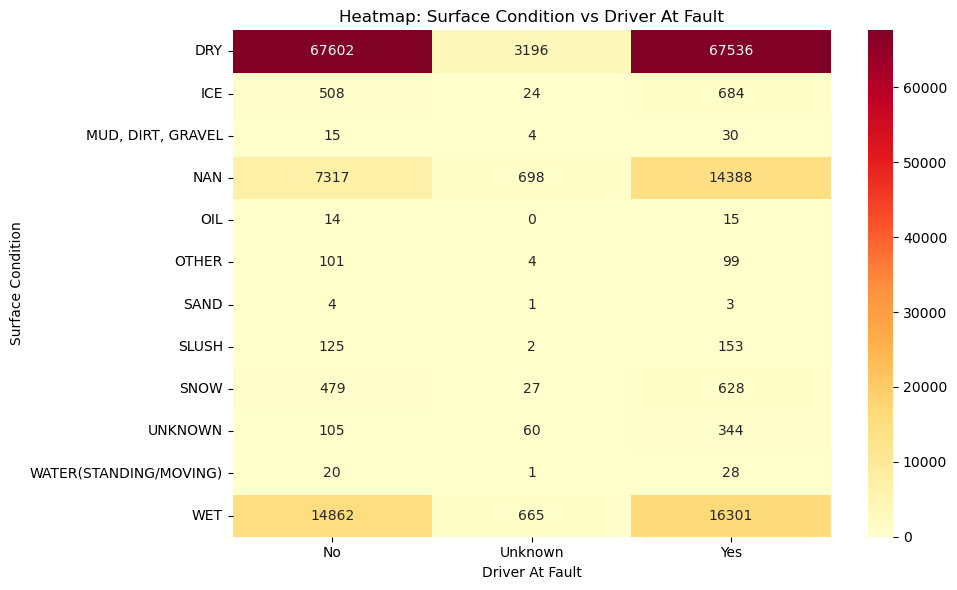

In [27]:
print(df.columns.tolist())
df_heatmap = df[['Driver At Fault', 'Surface Condition']]
crosstab = pd.crosstab(df_heatmap['Surface Condition'], df_heatmap['Driver At Fault'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Heatmap: Surface Condition vs Driver At Fault')
plt.xlabel('Driver At Fault')
plt.ylabel('Surface Condition')
plt.tight_layout()
plt.show()

## Research_Question_2

## **When are crashes most likely to occur and how serious are they?**

This analysis focuses on the **temporal patterns** of traffic crashes by examining:

1. **Time of Day**  
2. **Day of the Week**  
3. **Injury Severity Trends Over Time**

### Key Visualizations for Analysis

- **Bar Chart for Crashes by Hour of Day**
  - Reveals peak crash periods during **morning (7–9 AM)** and **evening rush hours (4–6 PM)**.
  - Lesser incidents during **late night/early morning hours**.

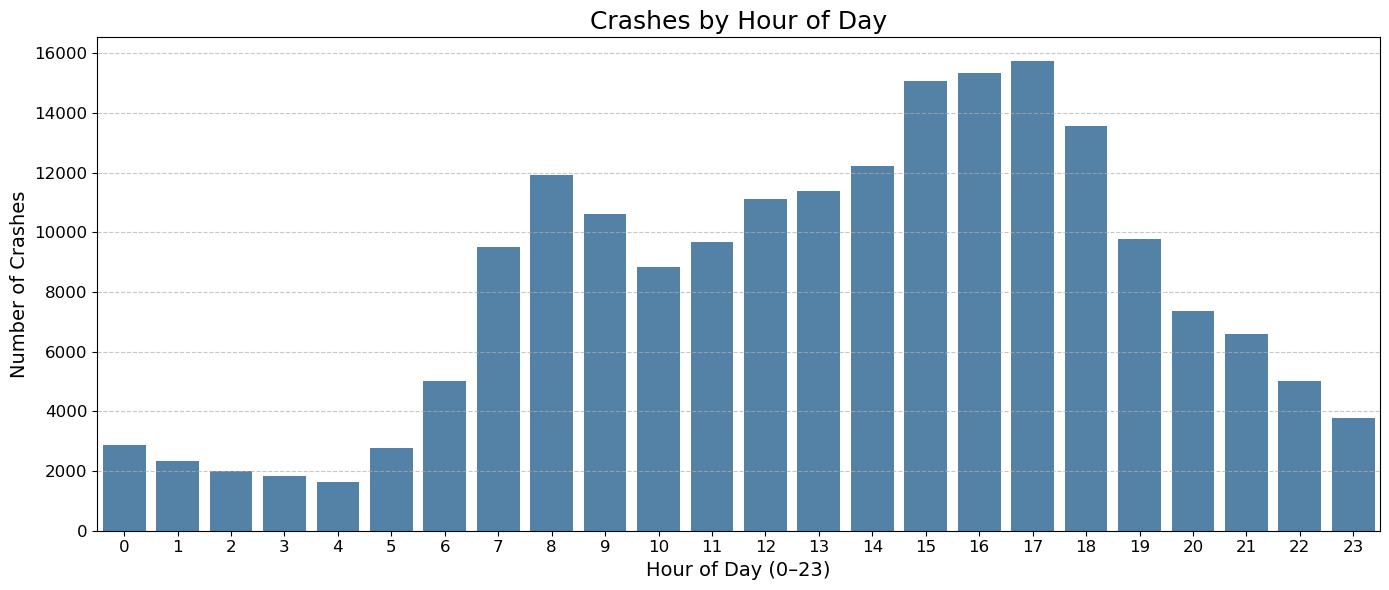

In [28]:
# Prepare data
hourly_data = df['Hour'].value_counts().sort_index().reset_index()
hourly_data.columns = ['Hour', 'Crash Count']

# Plot using Seaborn
plt.figure(figsize=(14, 6))
sns.barplot(data=hourly_data, x='Hour', y='Crash Count', color='steelblue')

# Styling
plt.title('Crashes by Hour of Day', fontsize=18)
plt.xlabel('Hour of Day (0–23)', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- **Bar Chart for Crashes by Weekday**
  - Crashes tend to increase from **Monday through Friday**, with a slight dip during weekends.
  - **Friday** typically records the **highest number of crashes**.

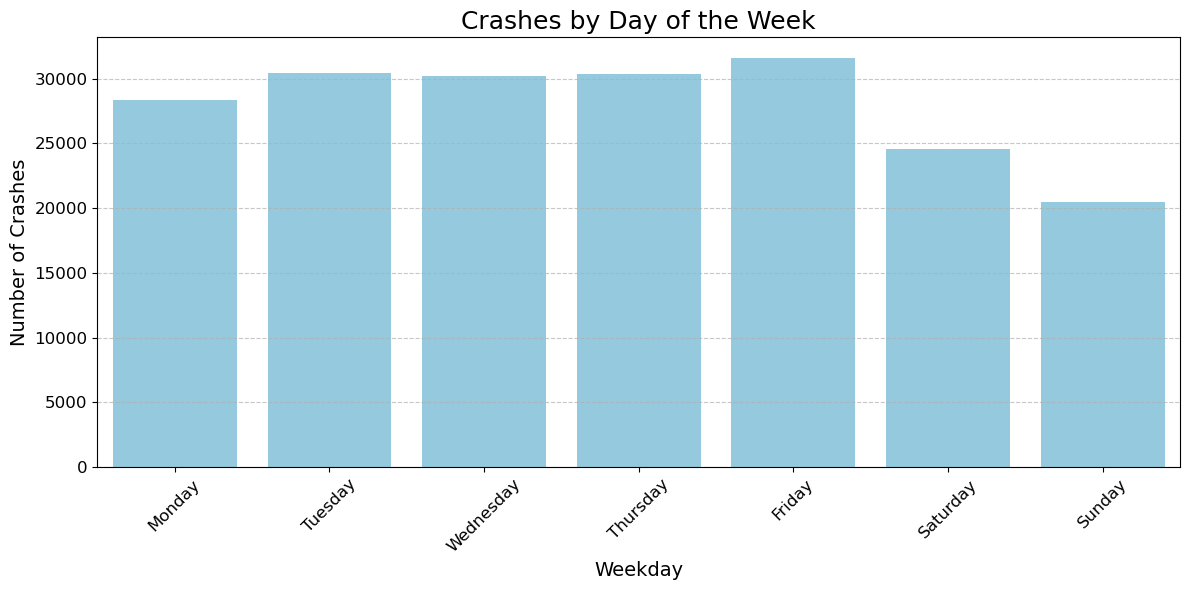

In [29]:
# Ensure correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#  Count and reindex
weekly_data = df['Weekday'].value_counts().reindex(weekday_order).reset_index()
weekly_data.columns = ['Weekday', 'Crash Count']

#  Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_data, x='Weekday', y='Crash Count', color='skyblue')

# Style and label
plt.title('Crashes by Day of the Week', fontsize=18)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- **Stacked Bar Chart for Hour of Day vs Injury Severity**
  - Indicates that **severe injuries** are more common during **evening hours**, possibly due to higher speeds or impaired driving.
  - **Minor injuries** dominate during most hours of the day.

In [33]:
# Group and prepare data
hourly_severity = (
    df.groupby(['Hour', 'Injury Severity'])
      .size()
      .reset_index(name='Count')
)

# Pivot to wide format for stacked bar chart
grouped = df.groupby(['Hour', 'Injury Severity']).size().reset_index(name='Count')

# Create the interactive stacked bar chart
fig = px.bar(
    grouped,
    x='Hour',
    y='Count',
    color='Injury Severity',
    title='Interactive Stacked Bar Chart: Hour of Day vs Injury Severity',
    labels={'Hour': 'Hour of Day', 'Count': 'Number of Crashes'},
    category_orders={'Hour': list(range(24))},  # Ensure hours are sorted correctly
)

# Update layout for better appearance
fig.update_layout(
    barmode='stack',
    xaxis=dict(tickmode='linear'),
    plot_bgcolor='rgba(0,0,0,0)',
    hovermode='x unified'
)

# Show the interactive plot
fig.show()

- **Heatmap for Crashes by Hour and Weekday**
  - Clearly shows **high density of crashes on weekdays during peak traffic hours**.
  - **Midday weekday periods** also reflect a steady number of incidents.

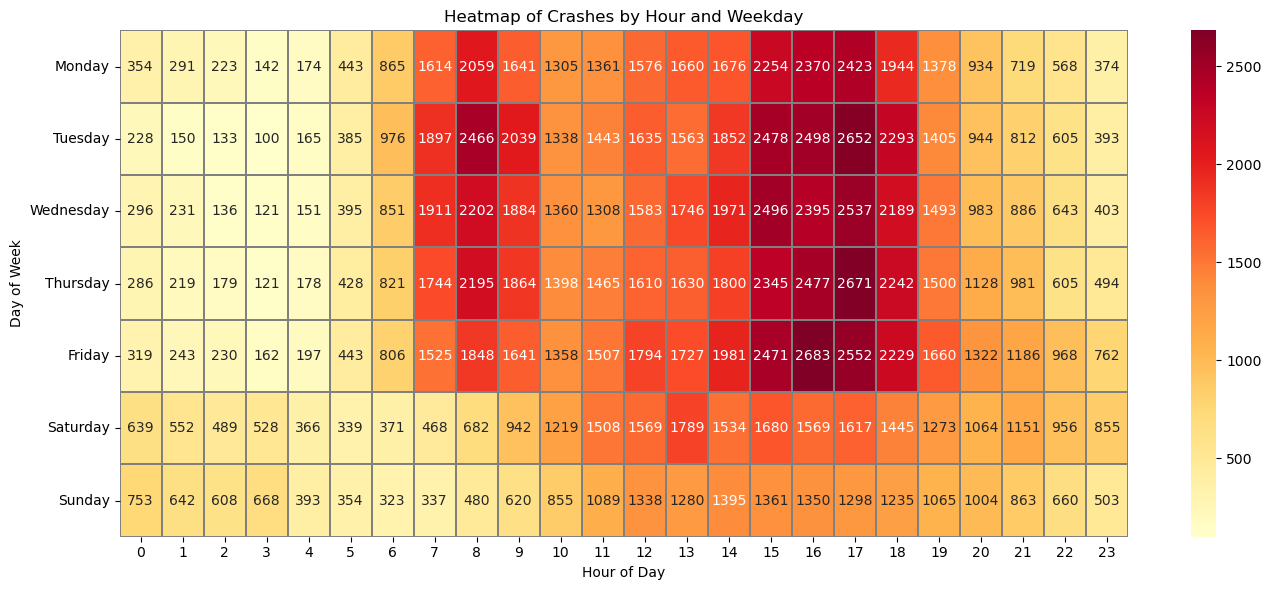

In [34]:
# Prepare data
heatmap_data = (
    df.groupby(['Weekday', 'Hour'])
      .size()
      .reset_index(name='Count')
)

# Ensure proper weekday order
df['Hour'] = df['Hour'].astype(int)

# Create a pivot table: rows = Weekday, columns = Hour, values = number of crashes
heatmap_data = df.pivot_table(index='Weekday', columns='Hour', aggfunc='size', fill_value=0)

# Reorder weekdays (optional for better flow: Monday to Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

# Plot heatmap with annotations
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.3, linecolor='gray')
plt.title('Heatmap of Crashes by Hour and Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

---

# 5

## **Conclusion: Research_Question_1**

- Environmental conditions play a vital role in crash dynamics.

**What should be done for to improve?**

**Suggestion**
- Improved **road maintenance**.
- Real-time **driver alerts** during adverse weather.
- Policy changes like **temporary speed limits** during hazardous conditions.
## **Conclusion: Research_Question_2**

- **Most crashes occur during peak commuting hours** and on **weekdays**, suggesting a strong correlation between traffic volume and crash frequency.
- **Severity tends to rise** in the evenings, emphasizing the need for awareness during **post-work travel**.

**How can it be improved?**

**Suggestion**
  - Adjusting traffic signal timings.
  - Increasing patrol during high-risk hours.
  - Public awareness campaigns around evening safety.

---

## Possible Next Steps could work on:

**Time-Series Forecasting**

- **Predict future crash trends** based on historical patterns through Machine Learning.

---

# 6

# Epilogue

**Reference:** [<span id="fn1">1.</span>](#fn1-back) _Author (https://catalog.data.gov/dataset?publisher=data.montgomerycountymd.gov)._ Title. Available at: https://catalog.data.gov/dataset/crash-reporting-drivers-data (Accessed: June 5, 2025). 

